# Albumentationsを用いたimgとboundingboxを同時調整の手法

[reference]
https://albumentations.ai/docs/examples/example_bboxes/

Define functions to visualize bounding boxes and class labels on an image
The visualization function is based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py



In [28]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [50]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)
    

# 重要

## pascal vocとcocoデータセットではboundingboxnのデータの扱いが異なる。

### [ex.resizeの場合]

1. coco dataset の場合\
transform = A.Compose([A.Resize(height=512, width=512, p=1.0)], 
                      p=1.0, bbox_params=A.BboxParams(                                     format='coco',label_fields['category_ids'])
                                    )
                                    
2. pascal vocの場合\
transform = A.Compose([A.Resize(height=512, width=512, p=1.0)], 
                      p=1.0, bbox_params=A.BboxParams(
                      format='pascal_voc',min_area=0.1, 
                      min_visibility=0.1,label_fields=['labels'])
                                    )

# Sample Code

In [56]:
sample_=cv2.imread("/Users/kayanoyohei/Desktop/30784590_18b637124e_z.jpg")
sample_=cv2.cvtColor(sample_, cv2.COLOR_BGR2RGB)
image=cv2.resize(sample_,(500,360))  #なぜかbboxesが合わないため調整(調整)

In [57]:
bboxes = [[5.66, 138.95, 147.09, 164.88], [366.7, 80.84, 132.8, 181.84]]
category_ids = [17, 18]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {17: 'cat', 18: 'dog'}

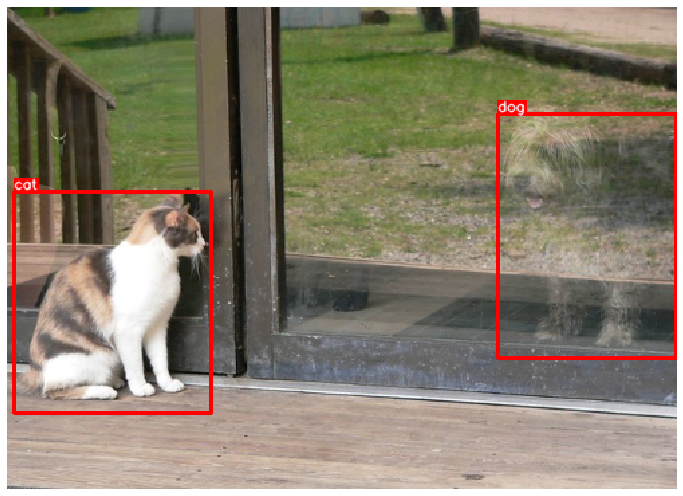

In [58]:
visualize(image, bboxes, category_ids, category_id_to_name)

# 1.Resize

In [59]:
transform = A.Compose([A.Resize(height=512, width=512, p=1.0)], 
                                    p=1.0, 
                                    bbox_params=A.BboxParams(
                                        format='coco',
                                        label_fields=['category_ids'])
                                    )

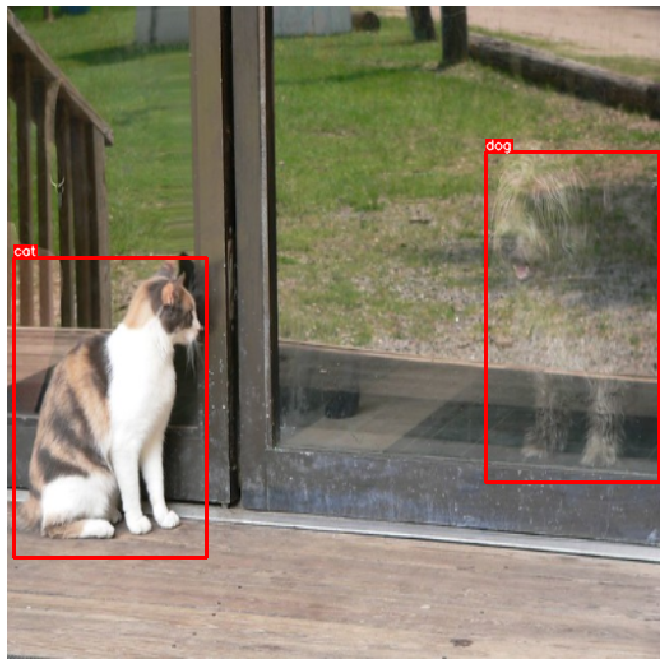

In [60]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,)

# 2.HorizontalFlip
水平反転

In [61]:
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

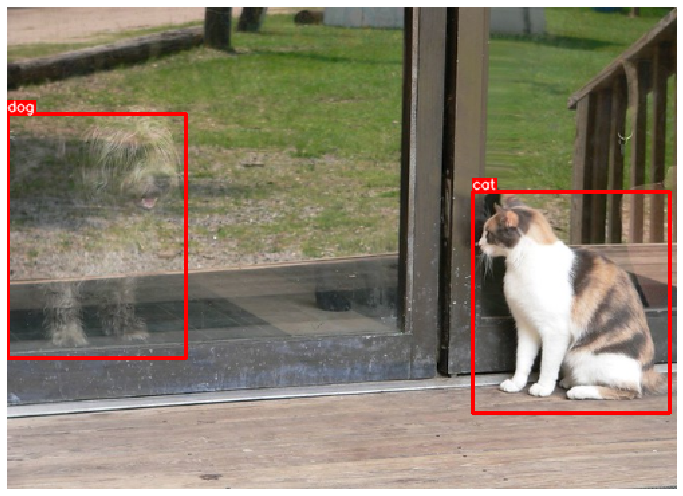

In [62]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,)

# 3.Crop

In [63]:
transform = A.Compose(
    [A.RandomSizedBBoxSafeCrop(width=448, height=336, erosion_rate=0.2)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

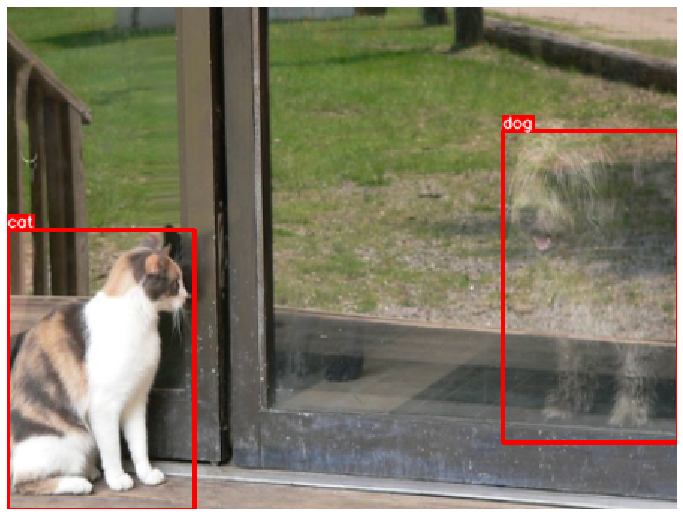

In [64]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)